# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing data

In [8]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = "iris_dataset.csv"

In [9]:
# url string that hosts our .csv file
url = "datasets/cartwheel/cartwheel.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(Ruta)



# Exploring the content of the data set

Get a general 'feel' of the data


In [12]:
df.shape


(150, 5)

In [13]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.describe()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [16]:
# Number of times that each distinct value of a variable occurs in a data set
df['target'].value_counts()

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [18]:
# Proportion of each distinct value of a variable occurs in a data set

df['petal width (cm)'].value_counts()

petal width (cm)
0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: count, dtype: int64

Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [20]:
# Total number of observations
total_observations = df.shape[0]
print(f"Total number of observations: {total_observations}")

# Total number of null observations in Age
total_null_age = df['sepal length (cm)'].isnull().sum()
print(f"Total number of null observations in 'sepal length (cm)': {total_null_age}")

# Total number of counts in Age (excluding missing values)
total_counts_age = df['sepal length (cm)'].count()
print(f"Total number of counts in 'sepal length (cm)' (excluding missing values): {total_counts_age}")




Total number of observations: 150
Total number of null observations in 'sepal length (cm)': 0
Total number of counts in 'sepal length (cm)' (excluding missing values): 150


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

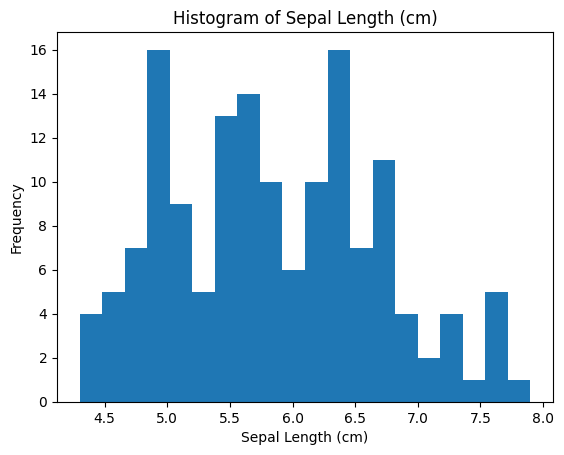

In [21]:
# Plot histogram of Age

df['sepal length (cm)'].plot(kind='hist', bins=20, title='Histogram of Sepal Length (cm)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

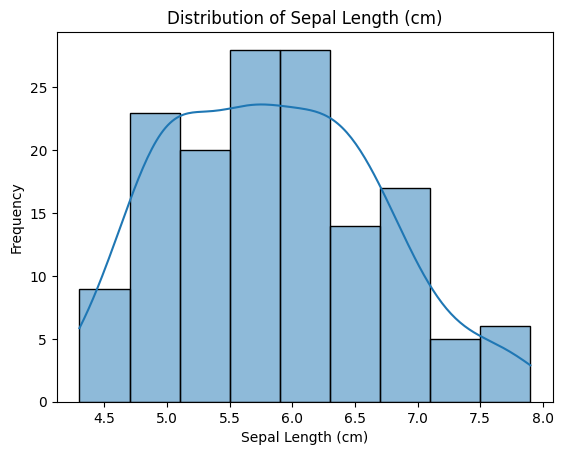

In [22]:
# Plot distribution of CWDistance
sns.histplot(df['sepal length (cm)'], kde=True)
plt.title('Distribution of Sepal Length (cm)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


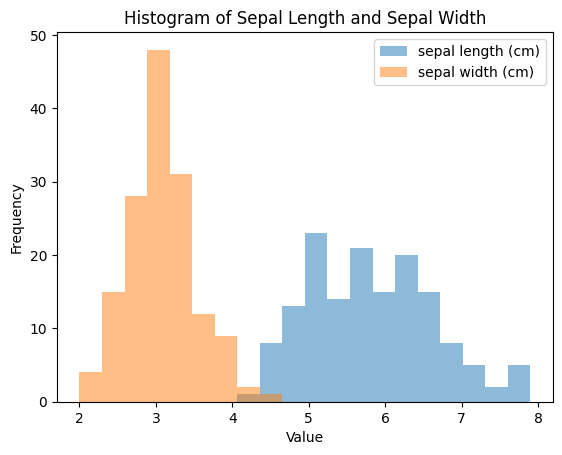

In [23]:
# Plot histogram of both the Age and the Wingspan

# Plot histogram of Sepal Length and Sepal Width
df[['sepal length (cm)', 'sepal width (cm)']].plot(kind='hist', bins=20, alpha=0.5, title='Histogram of Sepal Length and Sepal Width')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

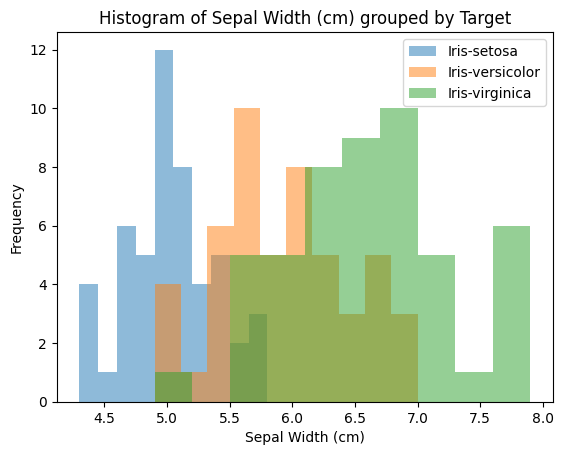

In [26]:
# Create histograms of the "Wingspan" grouped by "Gender"


df.groupby('target')['sepal length (cm)'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Histogram of Sepal Width (cm) grouped by Target')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

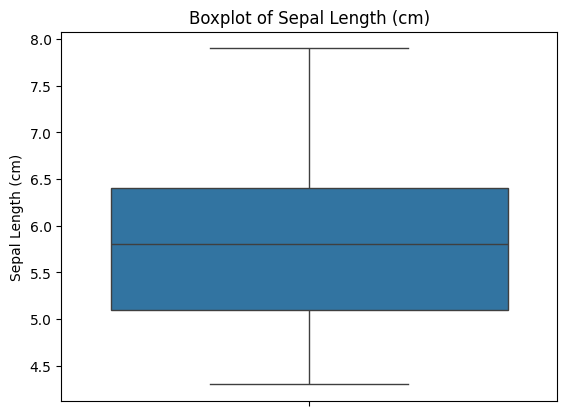

In [27]:
# Create the boxplot of the "CWDistance"

sns.boxplot(data=df, y='sepal length (cm)')
plt.title('Boxplot of Sepal Length (cm)')
plt.ylabel('Sepal Length (cm)')
plt.show()

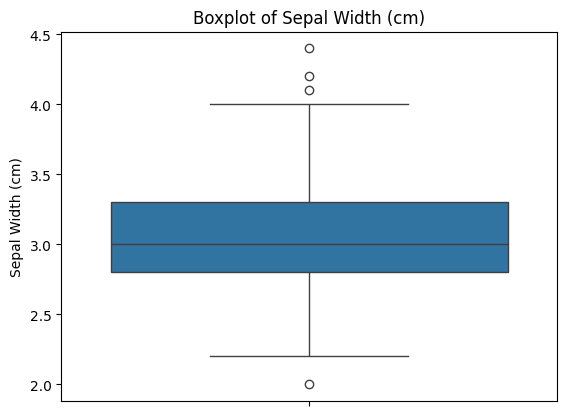

In [28]:
# Create the boxplot of the "Height"

sns.boxplot(data=df, y='sepal width (cm)')
plt.title('Boxplot of Sepal Width (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

Text(0, 0.5, 'Petal Length (cm)')

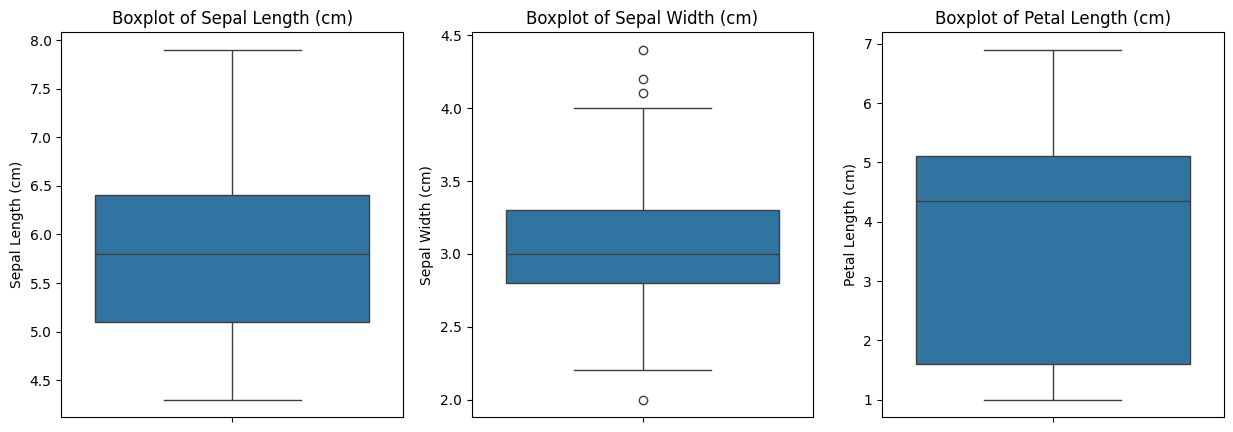

In [31]:
# Create the boxplots of the "CWDistance", "Height" and "Wingspan"

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=df, y='sepal length (cm)', ax=axes[0])
axes[0].set_title('Boxplot of Sepal Length (cm)')
axes[0].set_ylabel('Sepal Length (cm)')

sns.boxplot(data=df, y='sepal width (cm)', ax=axes[1])
axes[1].set_title('Boxplot of Sepal Width (cm)')
axes[1].set_ylabel('Sepal Width (cm)')

sns.boxplot(data=df, y='petal length (cm)', ax=axes[2])
axes[2].set_title('Boxplot of Petal Length (cm)')
axes[2].set_ylabel('Petal Length (cm)')



In [ ]:
# Create the boxplots of the "CWDistance" and of the "Wingspan"



# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

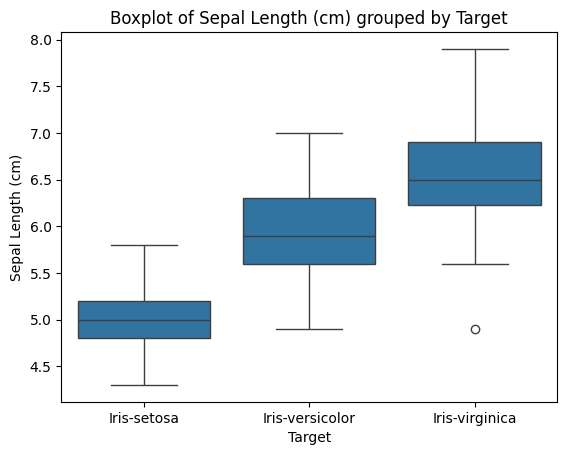

In [36]:
# Create side-by-side boxplots of the "CWDistance" grouped by "Gender"
#sns.boxplot(data=df, y='CWDistance', hue='Gender', gap=.4)

sns.boxplot(data=df, x='target', y='sepal length (cm)')
plt.title('Boxplot of Sepal Length (cm) grouped by Target')
plt.xlabel('Target')
plt.ylabel('Sepal Length (cm)')
plt.show()


# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


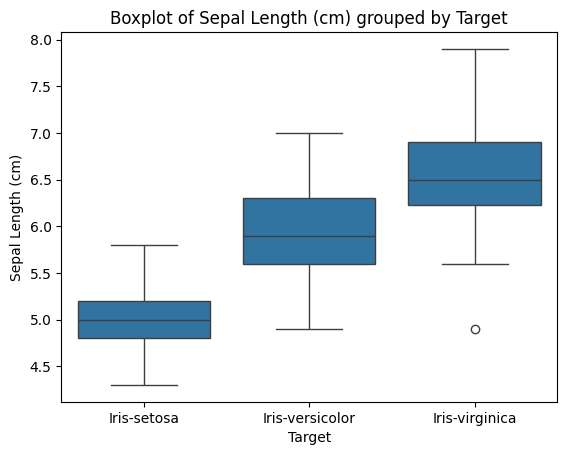

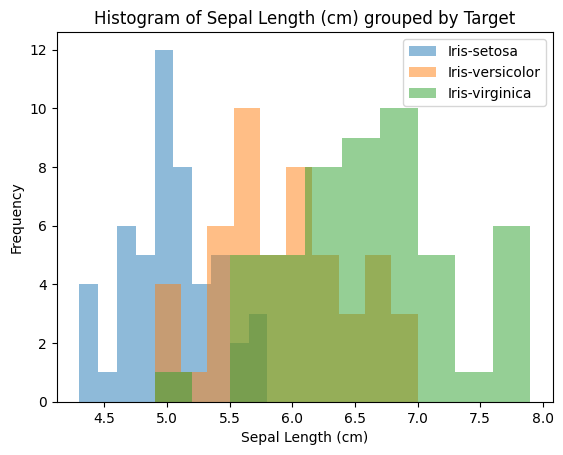

In [38]:
# Create a boxplot and histogram of the "tips" grouped by "Gender"

# Create a boxplot of the "sepal length (cm)" grouped by "target"
sns.boxplot(data=df, x='target', y='sepal length (cm)')
plt.title('Boxplot of Sepal Length (cm) grouped by Target')
plt.xlabel('Target')
plt.ylabel('Sepal Length (cm)')
plt.show()

# Create histograms of the "sepal length (cm)" grouped by "target"
df.groupby('target')['sepal length (cm)'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Histogram of Sepal Length (cm) grouped by Target')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

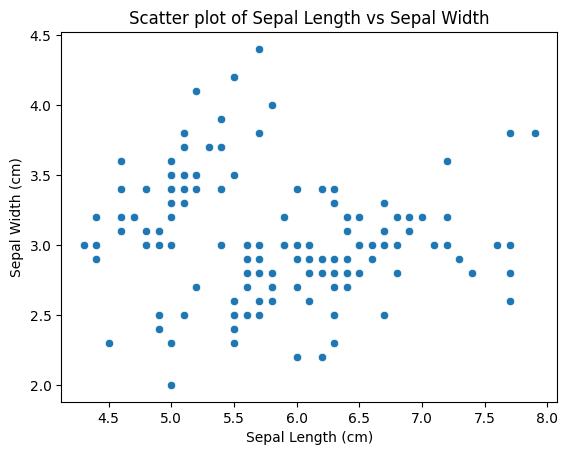

In [39]:
# scatter plot between two variables
# Scatter plot between Sepal Length and Sepal Width
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)')
plt.title('Scatter plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

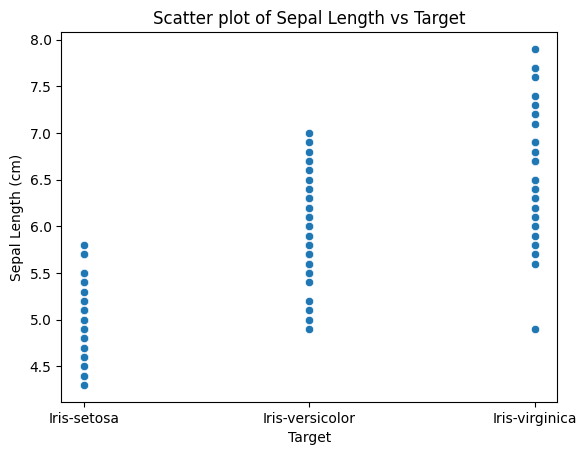

In [40]:
# scatter plot between two variables (one categorical)
# Scatter plot between Sepal Length and Target
sns.scatterplot(data=df, x='target', y='sepal length (cm)')
plt.title('Scatter plot of Sepal Length vs Target')
plt.xlabel('Target')
plt.ylabel('Sepal Length (cm)')
plt.show()

In [ ]:
# scatter plot between two variables grouped according to a categorical variable


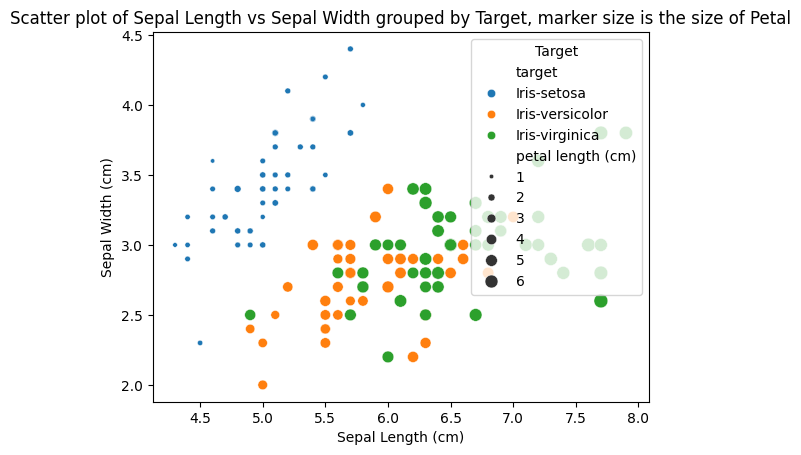

In [45]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers
# Scatter plot between Sepal Length and Sepal Width grouped by Target with size of markers based on Petal Length
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target', size='petal length (cm)', sizes=(10, 100))
plt.title('Scatter plot of Sepal Length vs Sepal Width grouped by Target, marker size is the size of Petal')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Target')
plt.show()

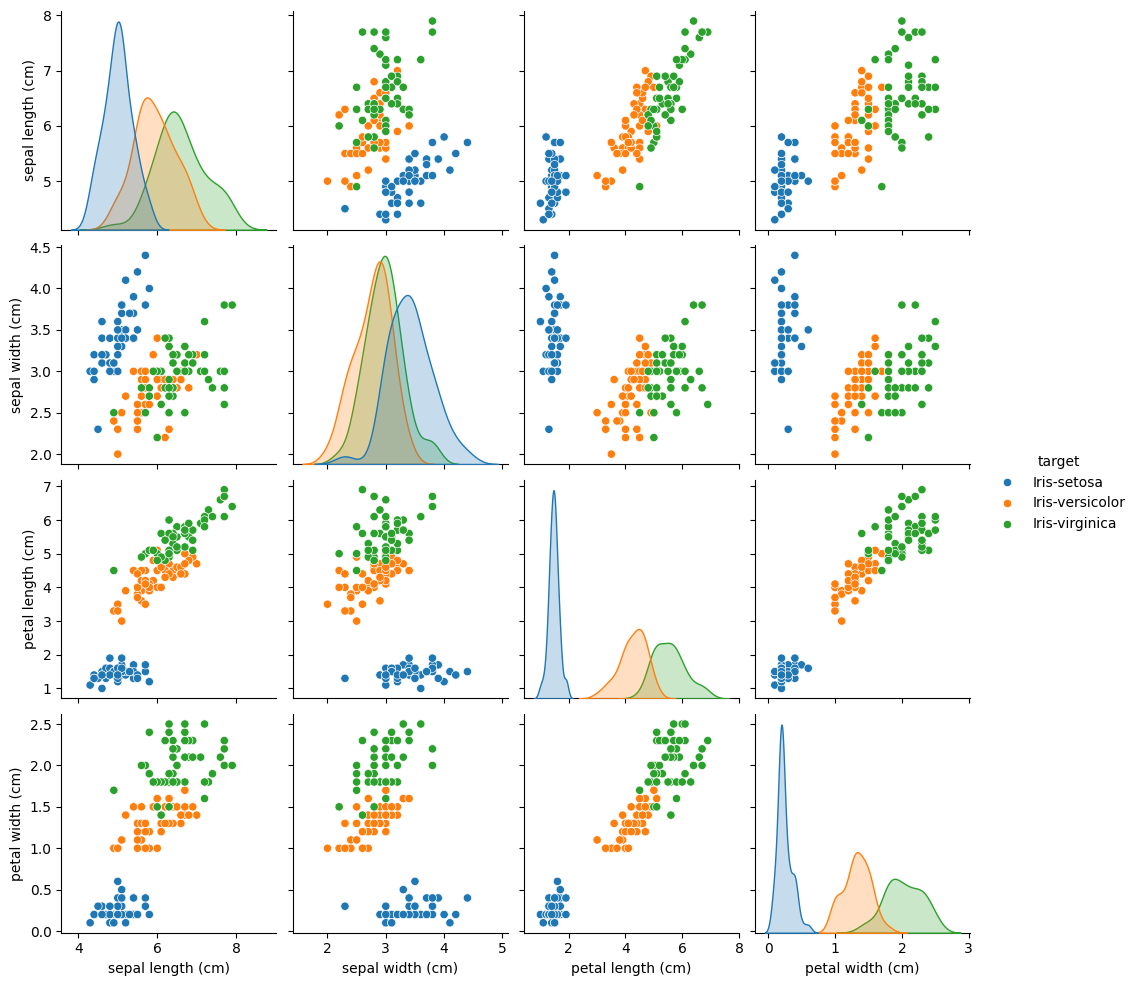

In [41]:
# Pairplot: Scatterplot of "Age","CWDistance","Height",'Wingspan'

sns.pairplot(df, vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], hue='target')
plt.show()

# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables
